In [1]:
# Basic set of Python Data Analysis
import numpy as np
import pandas as pd
%matplotlib inline

## don't show warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
## for machine learning with scikit learn
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

## for generate data
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

## for evalute cluster
from sklearn import metrics
evalute = metrics.silhouette_score
# evalute = metrics.calinski_harabasz_score
# evalute = metrics.davies_bouldin_score

## for my functions
import testml as tml

# Gaussian Distribution

## Generate Data

In [3]:
data1  = np.random.randn(150,2)+[1,5]
label1 = 0*np.ones(len(data1))
data2  = np.random.randn(200,2)+[6,6]
label2 = np.ones(len(data2))
data3  = np.random.randn(250,2)+[3,1]
label3 = 2*np.ones(len(data3))
data  = np.concatenate((data1,data2,data3),axis = 0)
label = np.concatenate((label1,label2,label3),axis = 0)

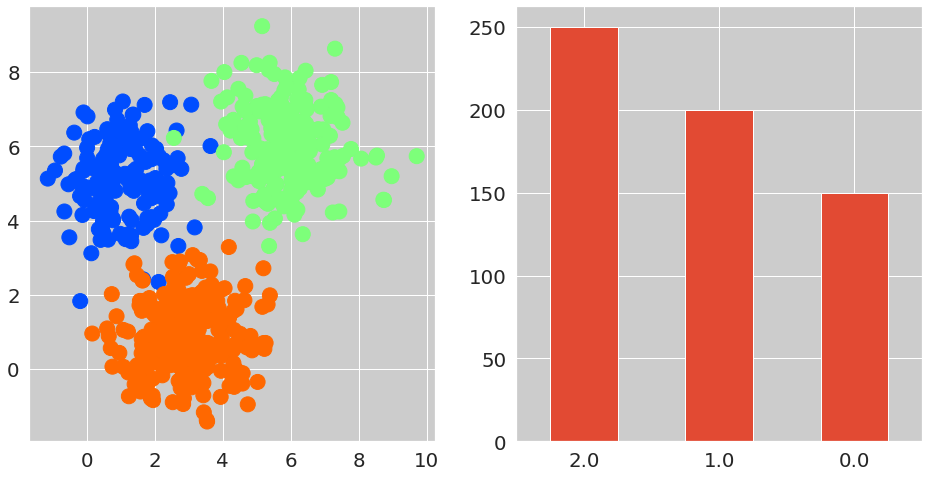

In [4]:
tml.srcplot(data, label)

## KMeans

In [5]:
score_KMeans = pd.DataFrame(columns=["ncluster", "score"])
for n in np.arange(2,10):
    cl = KMeans(n_clusters=n,n_init=50).fit_predict(data)
    score_KMeans.loc[len(score_KMeans.index)] = [n, evalute(data, cl)]

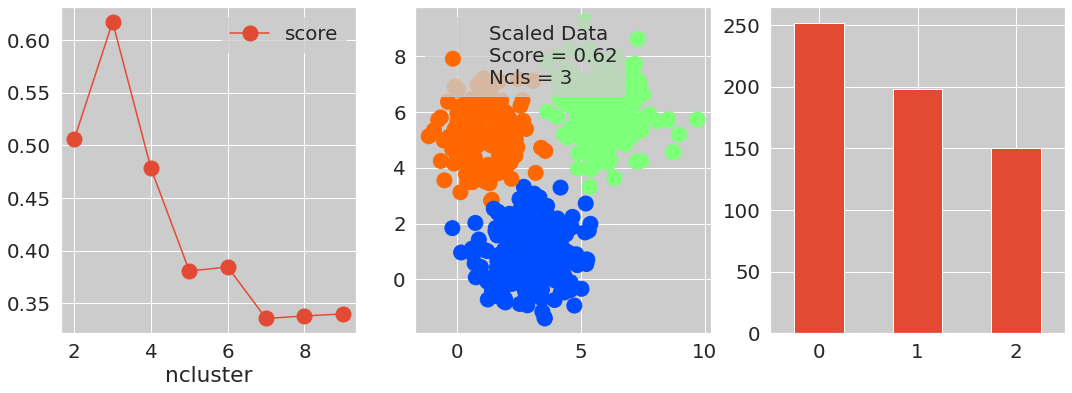

In [6]:
idxPeak = score_KMeans['score'].idxmax();
ncls = int(score_KMeans.loc[idxPeak,'ncluster'])
cl = KMeans(n_clusters=ncls, n_init=50).fit_predict(data)
lab = "Scaled Data\nScore = {:.2f}\nNcls = {:d}".format(evalute(data, cl), ncls)

## plot data
tml.clplot(score_KMeans.set_index('ncluster'), cl, lab, data)

## SpectralClustering

In [7]:
score_Spectral = pd.DataFrame(columns=["gamma", "ncls", "score"])
for gamma in [0.1, 0.5, 1.0]:
    for ncls in np.arange(2,10):
        cl = SpectralClustering(n_clusters=ncls, gamma=gamma).fit_predict(data)
        score_Spectral.loc[len(score_Spectral.index)] = [gamma, ncls, evalute(data, cl)]

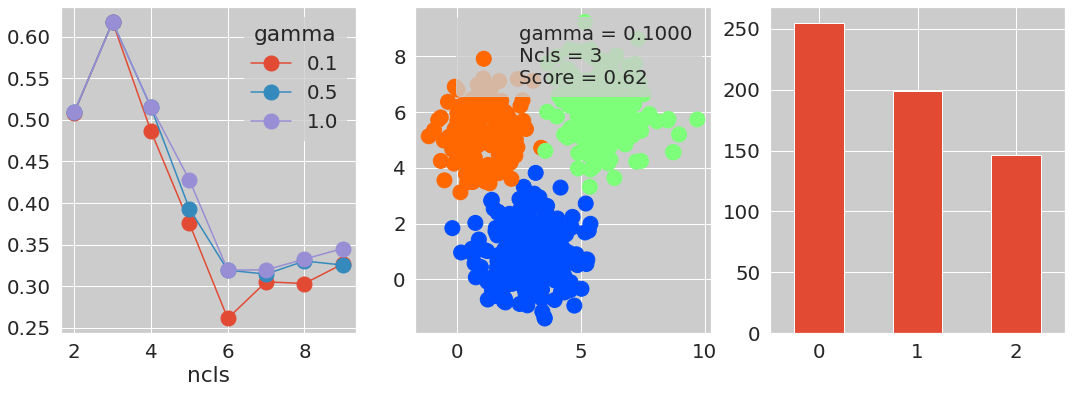

In [8]:
idxPeak = score_Spectral['score'].idxmax();
gamma   = score_Spectral.loc[idxPeak,"gamma"]
ncls    = score_Spectral.loc[idxPeak, "ncls"].astype(int)
cl  = SpectralClustering(n_clusters=ncls, gamma=gamma).fit_predict(data)
lab = "gamma = {:.4f}\nNcls = {:d}\nScore = {:.2f}".format(gamma, ncls, evalute(data, cl))

### plot data
tml.clplot(score_Spectral.pivot(index='ncls', columns="gamma", values="score"), cl, lab, data)

## DBSCAN

In [9]:
score_DBSCAN = pd.DataFrame(columns=["cutoff", "Min Samples", "score"])
for f in [0.08, 0.1, 0.5]:
    for n in np.arange(2,5):
        cl = DBSCAN(eps=f, min_samples=n).fit_predict(data)
        if(np.max(cl) < 1):
            score_DBSCAN.loc[len(score_DBSCAN.index)] = [f, n, -1]
        else:
            score_DBSCAN.loc[len(score_DBSCAN.index)] = [f, n, evalute(data, cl)]

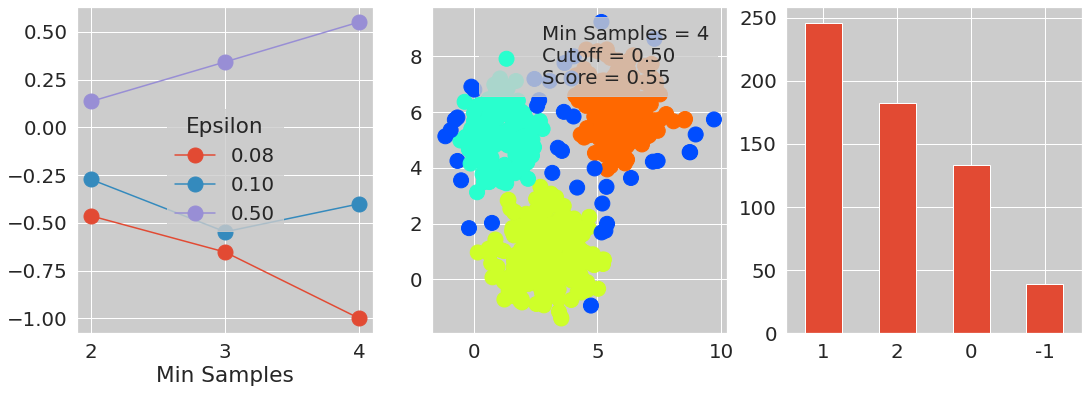

In [10]:
### the opt parameter
idxPeak = score_DBSCAN['score'].idxmax();
f  = score_DBSCAN.loc[idxPeak,"cutoff"]
n  = score_DBSCAN.loc[idxPeak, "Min Samples"].astype(int)
cl = DBSCAN(eps=f, min_samples=n).fit_predict(data)
lab = "Min Samples = {:d}\nCutoff = {:.2f}\nScore = {:.2f}".format(n, f, evalute(data, cl))

#### plot data
score_DBSCAN['Epsilon'] = score_DBSCAN['cutoff'].map(lambda x:('%.2f')%x)
tml.clplot(score_DBSCAN.pivot(index='Min Samples', columns="Epsilon", values="score"), cl, lab, data)

# Moon data

## Generate Data

In [11]:
X, y = make_moons(n_samples=1000, noise=0.05)

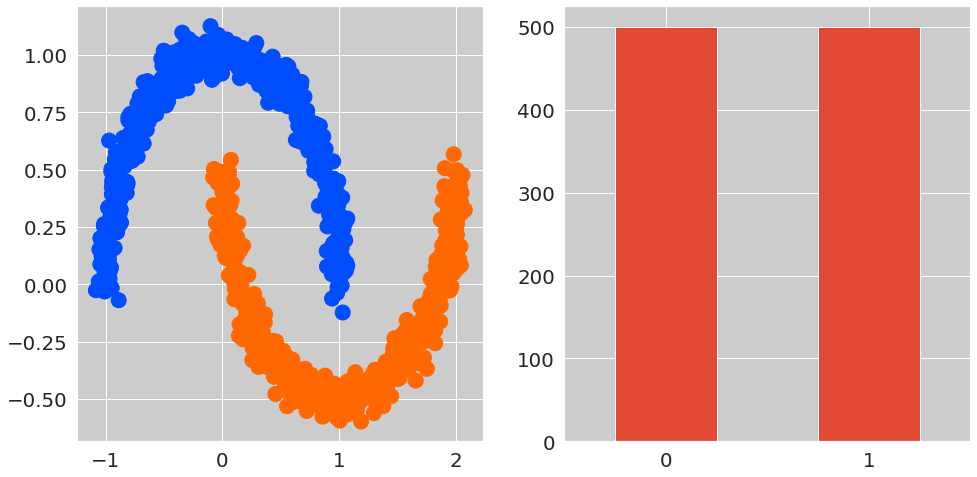

In [12]:
tml.srcplot(X,y)

## DBSCAN

In [13]:
moon_DBSCAN = pd.DataFrame(columns=["eps", "Min Samples", "score"])
for f in [0.05, 0.1, 0.15, 0.2]:
    for n in np.arange(3,8):
        cl = DBSCAN(eps=f, min_samples=n).fit_predict(X)
        if(np.max(cl) < 1):
            moon_DBSCAN.loc[len(moon_DBSCAN.index)] = [f, n, -1]
        else:
            moon_DBSCAN.loc[len(moon_DBSCAN.index)] = [f, n, evalute(X, cl)]

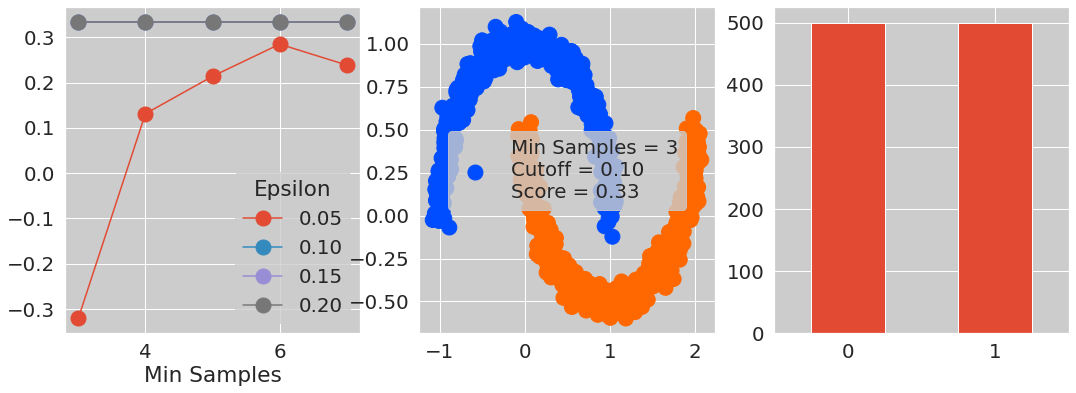

In [14]:
### the opt parameter
idxPeak = moon_DBSCAN['score'].idxmax();
f  = moon_DBSCAN.loc[idxPeak,"eps"]
n  = moon_DBSCAN.loc[idxPeak, "Min Samples"].astype(int)
cl = DBSCAN(eps=f, min_samples=n).fit_predict(X)
lab = "Min Samples = {:d}\nCutoff = {:.2f}\nScore = {:.2f}".format(n, f, evalute(X, cl))

#### plot data
moon_DBSCAN['Epsilon'] = moon_DBSCAN['eps'].map(lambda x:('%.2f')%x)
tml.clplot(moon_DBSCAN.pivot(index='Min Samples', columns="Epsilon", values="score"), cl, lab, X)

## Kmeans

In [15]:
moon_KMeans = pd.DataFrame(columns=["ncluster", "score"])
for n in np.arange(2,10):
    cl = KMeans(n_clusters=n,n_init=50).fit_predict(X)
    moon_KMeans.loc[len(moon_KMeans.index)] = [n, evalute(X, cl)]

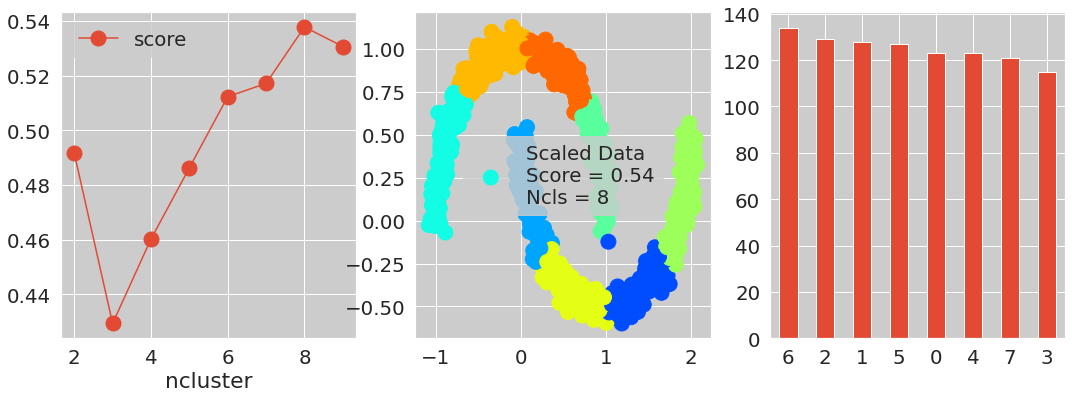

In [16]:
idxPeak = moon_KMeans['score'].idxmax();
ncls = int(moon_KMeans.loc[idxPeak,'ncluster'])
cl = KMeans(n_clusters=ncls, n_init=50).fit_predict(X)
lab = "Scaled Data\nScore = {:.2f}\nNcls = {:d}".format(evalute(X, cl), ncls)

## plot data
tml.clplot(moon_KMeans.set_index('ncluster'), cl, lab, X)

## Spectral Clustering

In [17]:
moon_Spectral = pd.DataFrame(columns=["gamma", "ncls", "score"])
for gamma in [0.005, 0.01, 0.05]:
    for ncls in np.arange(2,10):
        cl = SpectralClustering(n_clusters=ncls, gamma=gamma).fit_predict(X)
        moon_Spectral.loc[len(moon_Spectral.index)] = [gamma, ncls, evalute(X, cl)]

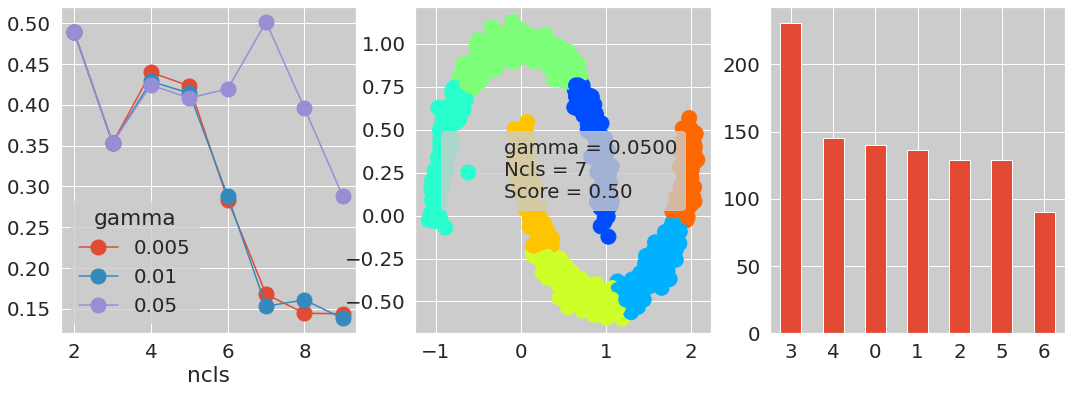

In [18]:
idxPeak = moon_Spectral['score'].idxmax();
gamma   = moon_Spectral.loc[idxPeak,"gamma"]
ncls    = moon_Spectral.loc[idxPeak, "ncls"].astype(int)
cl  = SpectralClustering(n_clusters=ncls, gamma=gamma).fit_predict(X)
lab = "gamma = {:.4f}\nNcls = {:d}\nScore = {:.2f}".format(gamma, ncls, evalute(X, cl))

### plot data
tml.clplot(moon_Spectral.pivot(index='ncls', columns="gamma", values="score"), cl, lab, X)

# Ellipse Gaussian Distribution

In [19]:
X,y = make_blobs(1000, 2, centers=4, random_state=7)
scale = np.array([[0.75, 1],[1, 0.75]])
Xs = np.dot(X, scale)

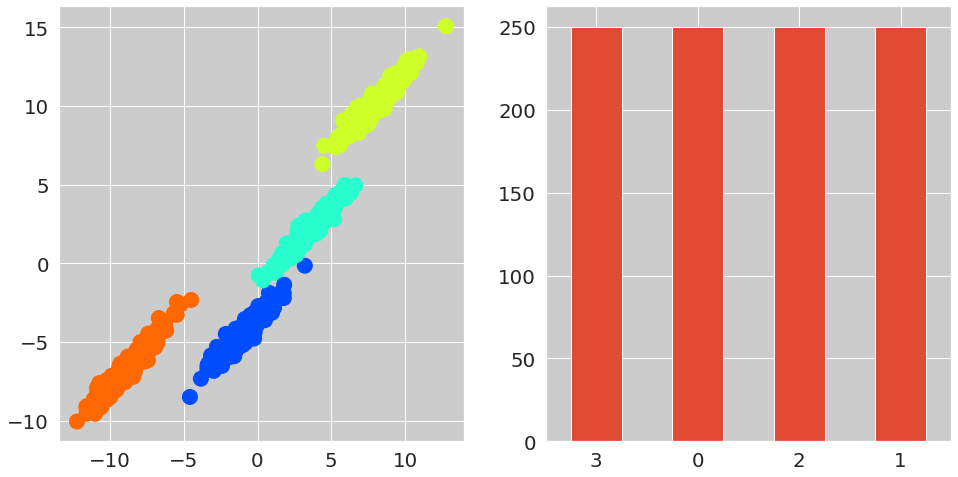

In [20]:
tml.srcplot(Xs, y)

## Kmeans

In [21]:
ellipse_KMeans = pd.DataFrame(columns=["ncluster", "score"])
for n in np.arange(2,10):
    cl = KMeans(n_clusters=n,n_init=50).fit_predict(Xs)
    ellipse_KMeans.loc[len(ellipse_KMeans.index)] = [n, evalute(Xs, cl)]

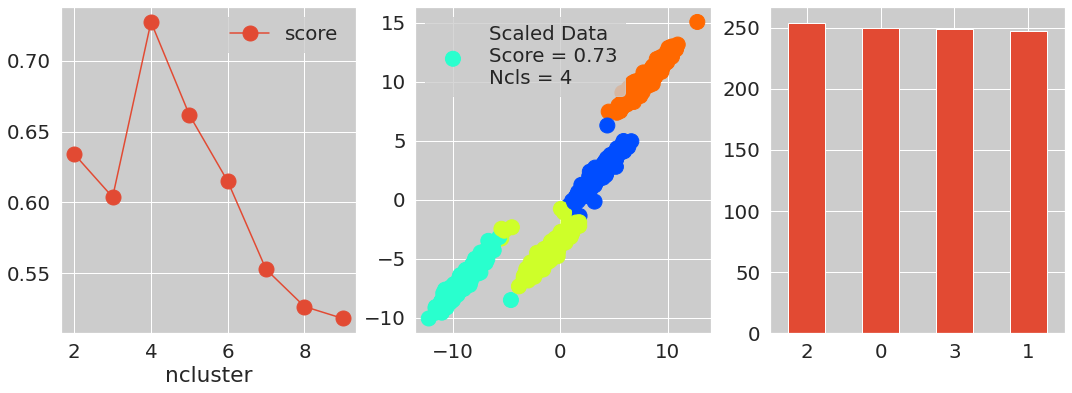

In [22]:
idxPeak = ellipse_KMeans['score'].idxmax();
ncls = int(ellipse_KMeans.loc[idxPeak,'ncluster'])
cl = KMeans(n_clusters=ncls, n_init=50).fit_predict(Xs)
lab = "Scaled Data\nScore = {:.2f}\nNcls = {:d}".format(evalute(Xs, cl), ncls)

## plot data
tml.clplot(ellipse_KMeans.set_index('ncluster'), cl, lab, Xs)

## Spectral Clustering

In [23]:
ellipse_Spectral = pd.DataFrame(columns=["gamma", "ncls", "score"])
for gamma in [0.005, 0.01, 0.05]:
    for ncls in np.arange(2,10):
        cl = SpectralClustering(n_clusters=ncls, gamma=gamma).fit_predict(Xs)
        ellipse_Spectral.loc[len(ellipse_Spectral.index)] = [gamma, ncls, evalute(Xs, cl)]

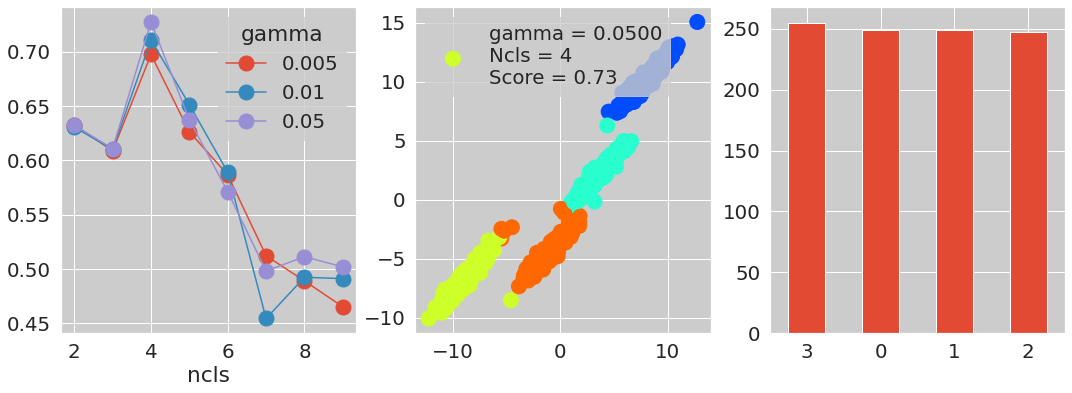

In [24]:
idxPeak = ellipse_Spectral['score'].idxmax();
gamma   = ellipse_Spectral.loc[idxPeak,"gamma"]
ncls    = ellipse_Spectral.loc[idxPeak, "ncls"].astype(int)
cl  = SpectralClustering(n_clusters=ncls, gamma=gamma).fit_predict(Xs)
lab = "gamma = {:.4f}\nNcls = {:d}\nScore = {:.2f}".format(gamma, ncls, evalute(Xs, cl))

### plot data
tml.clplot(ellipse_Spectral.pivot(index='ncls', columns="gamma", values="score"), cl, lab, Xs)

# Gaussian Mixture Model (GMM)

## For Clustering

In [25]:
ellipse_GMM = pd.DataFrame(columns=["ncluster", "score"])
for n in np.arange(2,10):
    cl = GaussianMixture(n_components=n).fit_predict(Xs)
    ellipse_GMM.loc[len(ellipse_GMM.index)] = [n, evalute(Xs, cl)]

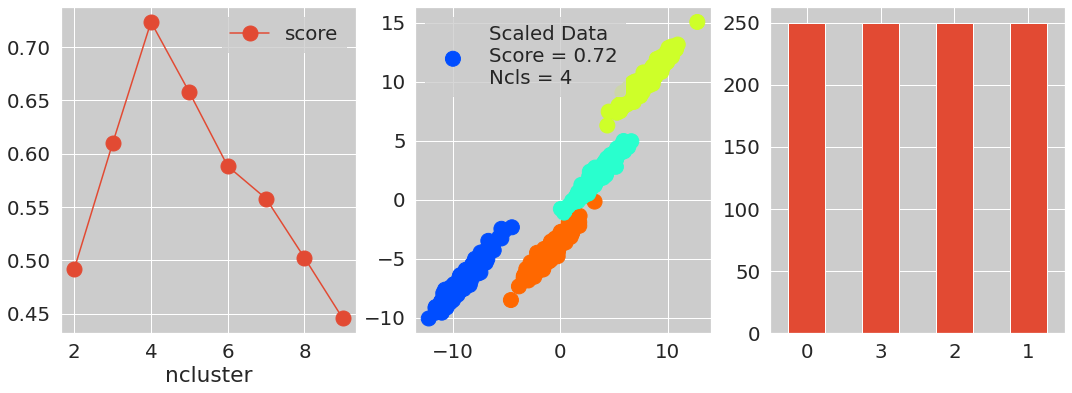

In [26]:
idxPeak = ellipse_GMM['score'].idxmax();
ncls = int(ellipse_GMM.loc[idxPeak,'ncluster'])
cl = GaussianMixture(n_components=ncls, n_init=50).fit_predict(Xs)
lab = "Scaled Data\nScore = {:.2f}\nNcls = {:d}".format(evalute(Xs, cl), ncls)

## plot data
tml.clplot(ellipse_GMM.set_index('ncluster'), cl, lab, Xs)

## For Distribution

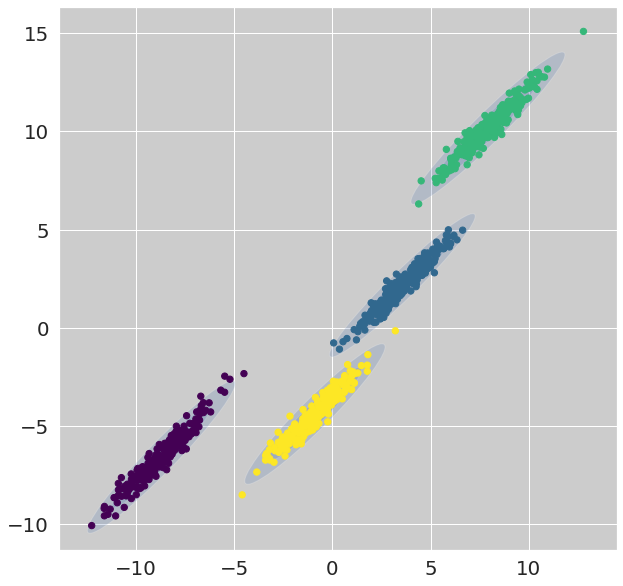

In [27]:
gmm  = GaussianMixture(n_components=ncls, n_init=50).fit(Xs)
tml.gmmplot(gmm, Xs)